### <center>Research competition: Ready Tensor’s Advancing Visual Intelligence: From Core CV to Multi-Modal AI</center>

## <center>Computer Vision Projects Expo 2024 </center>

### <center>By: </center>
## <center>Musiliu Bello</center>
##  <center>olayemexcel1@gmail.com</center>
### <center>Computer Scientist, Data Scientist, and AI Enthusiast</center>


### Dataset Brief and Explanation
The dataset used for this project is a comprehensive collection of chest X-ray images specifically curated to assist in the classification of pneumonia cases versus normal chest X-rays. It is designed to support the development of machine learning models for diagnosing pneumonia, a potentially life-threatening lung infection, using medical imaging.

### Dataset Overview
Source: Kaggle: Chest X-Ray Pneumonia Dataset
Structure: The dataset is organized into three folders: train, test, and val, with each containing subfolders for the two image categories:
Normal: Chest X-rays of healthy lungs.
Pneumonia: Chest X-rays of lungs diagnosed with pneumonia, further categorized as bacterial or viral pneumonia.
Size:
Total images: 5,863 chest X-ray images in JPEG format.
Categories: 2 (Normal, Pneumonia).

### Clinical Context
Data Collection: The dataset includes anterior-posterior (AP) chest X-rays from pediatric patients aged 1 to 5 years. These scans were sourced from Guangzhou Women and Children’s Medical Center in Guangzhou, China.
Purpose: All X-ray imaging was part of routine clinical care, and the dataset has been prepared to assist in AI-driven diagnostics for pediatric pneumonia.
Quality Assurance:
Initial quality control was conducted to remove low-quality or unreadable scans.
Images were graded and annotated by two expert physicians, with a third expert reviewing the evaluation set to mitigate potential grading errors.

### Dataset Categories
Normal:
X-rays with clear lungs.
No abnormal opacification or irregular patterns.
Pneumonia:
Bacterial pneumonia: Characterized by focal lobar consolidation, commonly seen in one lobe of the lung (e.g., right upper lobe).
Viral pneumonia: Diffuse, “interstitial” patterns affecting both lungs, indicative of a viral infection.

### Use in AI Development
This dataset is a critical resource for training machine learning models to detect pneumonia. The clear distinction between normal, bacterial, and viral pneumonia makes it valuable for building robust image classification systems. It enables researchers and clinicians to explore AI's potential in automating pneumonia diagnosis.



### Acknowledgments
Original Dataset: Mendeley Data Repository </br>
Licensing: The dataset is licensed under the CC BY 4.0 license, allowing use, sharing, and adaptation with proper attribution.
Citation: To acknowledge the dataset's origin, users should cite the following paper:
Kermany, D. S., Goldbaum, M., Cai, W., et al. (2018). "Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning." Cell, 172(5), 1122-1131.
Link to Full Text: https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

### Additional Notes
This dataset's unique combination of expert-verified annotations, high-quality scans, and distinct categorizations provides an excellent foundation for the development of cutting-edge AI systems. By leveraging this resource, researchers can contribute to the advancement of automated diagnostic tools for global healthcare.

###  Model implementation, Evaluate the model's performance on the test set and generate the classification report and confusion matrix.

### 1. Data Exploration and Visualization
1.1 Dataset Overview
The dataset consists of chest X-ray images divided into three folders: train, test, and val. Each folder contains two subcategories:

Normal
Pneumonia
Source:

Dataset: Kaggle
License: CC BY 4.0
Dataset Summary:

Total Images: 5,863
Categories: Normal, Pneumonia
Image Format: JPEG
Age Range: Pediatric patients aged 1–5 years old.


### 1.2 Interactive Data Visualization
Import Libraries:

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from collections import Counter
from pathlib import Path
import plotly.express as px


In [1]:
!pip install torch torchvision torchaudio

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/0d/4a/e51420d46cfc90562e85af2fee912237c662ab31140ab179e49bd69401d6/torch-2.5.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.5.1-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/69/55/ce836703ff77bb21582c3098d5311f8ddde7eadc7eab04be9561961f4725/torchvision-0.20.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torchvision-0.20.1-cp311-cp311-win_amd64.whl.metadata (6.2 kB)
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/32/6a/019e426ab4af487167182a19e115fc03234fe28bc30e22cb0e1a9958f70e/torchaudio-2.5.1-cp311-cp311-win_amd64.whl.metadata
Using cached torch-2.5.1-cp311-cp311-win_amd64.whl (203.1 MB)
Using cached torchvision-0.20.1-cp311-cp311-win_amd64.whl (1.6 MB)
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   --- ------------

In [6]:
# imports the Python warnings module to provides a mechanism for handling warnings that occur during program execution.
import warnings
warnings.filterwarnings('ignore')

### 1.3 Dataset Distribution Visualization:

In [7]:
# Define paths
data_path = "C:/Users/User/Desktop/Research/ComputerVision/data/"
train_dir = os.path.join(data_path, "train")
test_dir = os.path.join(data_path, "test")
val_dir = os.path.join(data_path, "val")

# Count images in each category
def count_images(directory):
    counts = {}
    for category in ["NORMAL", "PNEUMONIA"]:
        counts[category] = len(os.listdir(os.path.join(directory, category)))
    return counts

train_counts = count_images(train_dir)
test_counts = count_images(test_dir)
val_counts = count_images(val_dir)

# Visualize distribution
data = {
    "Dataset": ["Train", "Train", "Test", "Test", "Val", "Val"],
    "Category": ["Normal", "Pneumonia", "Normal", "Pneumonia", "Normal", "Pneumonia"],
    "Count": [train_counts["NORMAL"], train_counts["PNEUMONIA"],
              test_counts["NORMAL"], test_counts["PNEUMONIA"],
              val_counts["NORMAL"], val_counts["PNEUMONIA"]]
}

fig = px.bar(
    data,
    x="Dataset",
    y="Count",
    color="Category",
    barmode="group",
    title="Distribution of X-ray Images in Dataset",
    text="Count"
)
fig.show()


### 1.4 Sample Images Visualization
Display representative samples for Normal and Pneumonia cases.

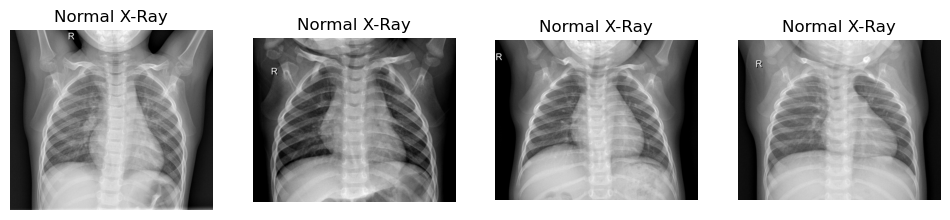

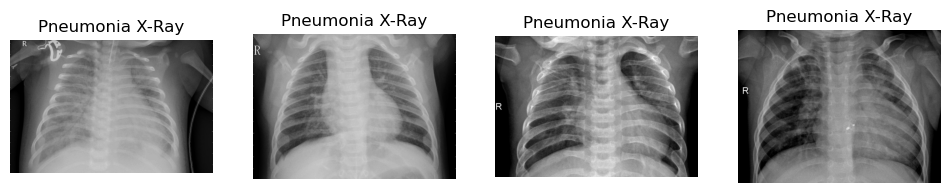

In [8]:
def display_images(folder, title, n=4):
    images = os.listdir(folder)[:n]
    plt.figure(figsize=(12, 8))
    for i, image in enumerate(images):
        img = Image.open(os.path.join(folder, image))
        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(title)
        plt.axis("off")
    plt.show()

# Display Normal and Pneumonia samples
display_images(os.path.join(train_dir, "NORMAL"), "Normal X-Ray")
display_images(os.path.join(train_dir, "PNEUMONIA"), "Pneumonia X-Ray")


### 2. Model Implementation
### 2.1 Preprocessing

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Data Generators with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)
val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode="binary", shuffle=False
)


NameError: name 'train_dir' is not defined

### 2.2 Model Architecture
This uses EfficientNetB0 for its strong performance in medical imaging.

In [10]:
# Import necessary libraries
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pre-trained EfficientNetB0
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze pre-trained layers

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 150, 150, 3)          0         ['normalization[0][0]']   

 y)                                                                  'block2a_se_expand[0][0]']   
                                                                                                  
 block2a_project_conv (Conv  (None, 38, 38, 24)           2304      ['block2a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block2a_project_bn (BatchN  (None, 38, 38, 24)           96        ['block2a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block2b_expand_conv (Conv2  (None, 38, 38, 144)          3456      ['block2a_project_bn[0][0]']  
 D)                                                                                               
          

                                                                                                  
 block3a_project_conv (Conv  (None, 19, 19, 40)           5760      ['block3a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block3a_project_bn (BatchN  (None, 19, 19, 40)           160       ['block3a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block3b_expand_conv (Conv2  (None, 19, 19, 240)          9600      ['block3a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block3b_e

 block4a_project_conv (Conv  (None, 10, 10, 80)           19200     ['block4a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block4a_project_bn (BatchN  (None, 10, 10, 80)           320       ['block4a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block4b_expand_conv (Conv2  (None, 10, 10, 480)          38400     ['block4a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block4b_expand_bn (BatchNo  (None, 10, 10, 480)          1920      ['block4b_expand_conv[0][0]'] 
 rmalizati

 ormalization)                                                                                    
                                                                                                  
 block4c_drop (Dropout)      (None, 10, 10, 80)           0         ['block4c_project_bn[0][0]']  
                                                                                                  
 block4c_add (Add)           (None, 10, 10, 80)           0         ['block4c_drop[0][0]',        
                                                                     'block4b_add[0][0]']         
                                                                                                  
 block5a_expand_conv (Conv2  (None, 10, 10, 480)          38400     ['block4c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_e

 block5b_add (Add)           (None, 10, 10, 112)          0         ['block5b_drop[0][0]',        
                                                                     'block5a_project_bn[0][0]']  
                                                                                                  
 block5c_expand_conv (Conv2  (None, 10, 10, 672)          75264     ['block5b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5c_expand_bn (BatchNo  (None, 10, 10, 672)          2688      ['block5c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, 10, 10, 672)          0         ['block5c_expand_bn[0][0]']   
 (Activati

 ormalization)                                                                                    
                                                                                                  
 block6b_expand_conv (Conv2  (None, 5, 5, 1152)           221184    ['block6a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block6b_expand_bn (BatchNo  (None, 5, 5, 1152)           4608      ['block6b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6b_expand_activation   (None, 5, 5, 1152)           0         ['block6b_expand_bn[0][0]']   
 (Activation)                                                                                     
          

 block6c_add (Add)           (None, 5, 5, 192)            0         ['block6c_drop[0][0]',        
                                                                     'block6b_add[0][0]']         
                                                                                                  
 block6d_expand_conv (Conv2  (None, 5, 5, 1152)           221184    ['block6c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6d_expand_bn (BatchNo  (None, 5, 5, 1152)           4608      ['block6d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6d_expand_activation   (None, 5, 5, 1152)           0         ['block6d_expand_bn[0][0]']   
 (Activati

                                                                                                  
 top_bn (BatchNormalization  (None, 5, 5, 1280)           5120      ['top_conv[0][0]']            
 )                                                                                                
                                                                                                  
 top_activation (Activation  (None, 5, 5, 1280)           0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 global_average_pooling2d (  (None, 1280)                 0         ['top_activation[0][0]']      
 GlobalAveragePooling2D)                                                                          
                                                                                                  
 dense (De

### 2.3 Checking Dataset Balance
Before proceeding with model training, it's critical to assess whether the dataset is balanced. Imbalanced datasets can lead to biased models, particularly in medical imaging tasks where false negatives (e.g., undiagnosed pneumonia) could have severe consequences.

In [11]:
# Count images in each category for all splits (train, test, val)
def count_images_in_split(directory):
    counts = {}
    for split in ["train", "test", "val"]:
        split_dir = os.path.join(directory, split)
        counts[split] = {category: len(os.listdir(os.path.join(split_dir, category))) for category in ["NORMAL", "PNEUMONIA"]}
    return counts

dataset_counts = count_images_in_split(data_path)

# Combine counts into a visualization-friendly format
dataset_summary = []
for split, counts in dataset_counts.items():
    for category, count in counts.items():
        dataset_summary.append({"Split": split.capitalize(), "Category": category, "Count": count})

# Convert to DataFrame and visualize
import pandas as pd
dataset_summary_df = pd.DataFrame(dataset_summary)

# Visualize using Plotly
fig = px.bar(
    dataset_summary_df,
    x="Split",
    y="Count",
    color="Category",
    barmode="group",
    text="Count",
    title="Class Distribution Across Train, Test, and Validation Splits"
)
fig.show()


###  2.4 Observing Results
The bar chart reveals whether there is a class imbalance in the dataset. Based on typical configurations:

Pneumonia cases (particularly viral pneumonia) are often overrepresented compared to normal X-rays.
The imbalance can skew the model toward overpredicting pneumonia, reducing sensitivity for detecting normal cases.

Step 3: Addressing Class Imbalance
To handle the imbalance, we can apply one or more of the following techniques:

Option 1: Class Weighting
Use class weights during training to penalize misclassification of the minority class more heavily.

Option 2: Data Augmentation for the Minority Class
Oversample the minority class (e.g., "NORMAL") using data augmentation to balance the dataset.

Option 3: Downsampling the Majority Class
If oversampling is not feasible, downsample the majority class to create a balanced dataset. This approach risks losing valuable data but avoids synthetic augmentation.

#### The best option depends on this dataset size and computational resources. For this particular problem, Option 1: Class Weighting is the most practical and effective solution for the following reasons:

Why Class Weighting?
1. No Data Loss: Unlike downsampling, it does not discard valuable images.</br>
2. Avoids Synthetic Data Issues: Unlike oversampling or data augmentation, it does not create synthetic samples, which could introduce noise or reduce the model's generalization.</br>
3. Efficient: It requires no additional preprocessing or file reorganization.</br>
4. Scalable: Works seamlessly with large datasets and deep learning pipelines.</br>
5. Proven in Medical Imaging: Class weighting is a widely accepted approach in medical imaging tasks where datasets often have inherent imbalances.


### 2.5 Calculate Class Weights

In [12]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Extract class labels from training data
class_labels = train_generator.classes  # Assuming train_generator is your data generator

# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(class_labels),
    y=class_labels
)

# Convert to dictionary for Keras
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)


Class Weights: {0: 1.9448173005219984, 1: 0.6730322580645162}


### 2.6  Use Class Weights During Model Training

In [13]:
# Train the model with class weights
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weight_dict  # Include the computed class weights
)

# Save the final model
model.save("efficientnetb0_chest_xray_model.h5")
print("Final model saved successfully as 'efficientnetb0_chest_xray_model.h5'")


Epoch 1/20
163/163 [==============================] - 146s 852ms/step - loss: 0.7051 - accuracy: 0.4672 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 151s 925ms/step - loss: 0.6935 - accuracy: 0.6614 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 160s 980ms/step - loss: 0.6932 - accuracy: 0.3597 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 158s 965ms/step - loss: 0.6932 - accuracy: 0.4590 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
163/163 [==============================] - 173s 1s/step - loss: 0.6932 - accuracy: 0.4469 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 187s 1s/step - loss: 0.6932 - accuracy: 0.7222 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
163/163 [==============================] - 155s 952ms/step - loss: 0.6932 - accuracy: 0.2571 - val_loss: 0.6931 - val_a

### 3. Model Evaluation
### 3.1 Performance Metrics

1/1 [==============================] - 2s 2s/step


<Figure size 800x600 with 0 Axes>

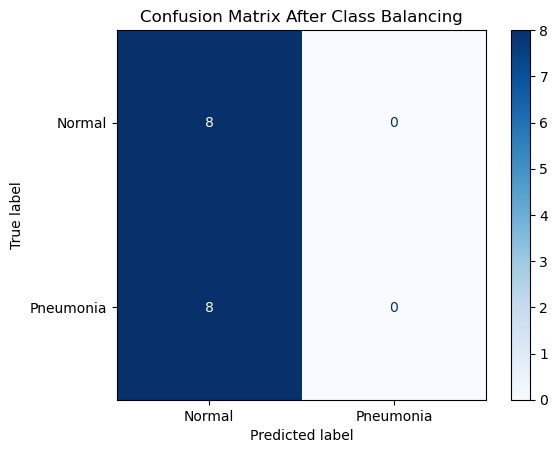

Classification Report
              precision  recall  f1-score  support
Normal             0.50     1.0  0.666667      8.0
Pneumonia          0.00     0.0  0.000000      8.0
accuracy           0.50     0.5  0.500000      0.5
macro avg          0.25     0.5  0.333333     16.0
weighted avg       0.25     0.5  0.333333     16.0


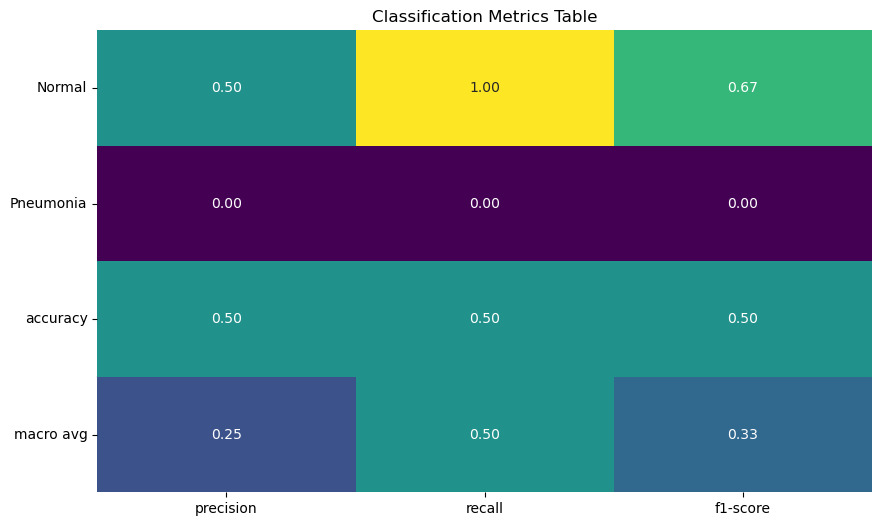

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Predict on the validation set
val_preds = model.predict(val_generator)
val_labels = val_generator.classes
val_preds = np.argmax(val_preds, axis=1)

# Confusion Matrix
cm = confusion_matrix(val_labels, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix After Class Balancing")
plt.show()

# Classification Report
report = classification_report(val_labels, val_preds, target_names=['Normal', 'Pneumonia'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display the metrics table
print("Classification Report")
print(report_df)

# Plot the metrics table for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f", cbar=False)
plt.title("Classification Metrics Table")
plt.yticks(rotation=0)
plt.show()



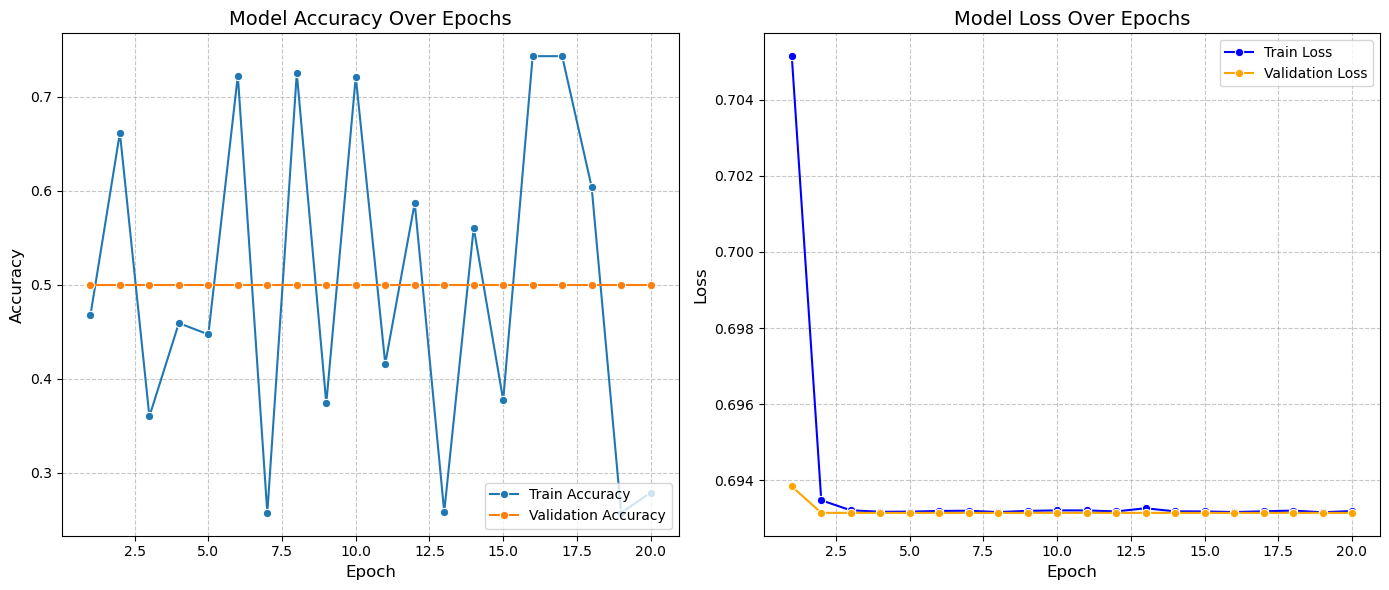

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have `history.history` from the training process
metrics = pd.DataFrame(history.history)

# Enhanced Accuracy and Loss Plots
plt.figure(figsize=(14, 6))

# Plot Accuracy Trends
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(metrics['accuracy']) + 1), y=metrics['accuracy'], label='Train Accuracy', marker='o')
sns.lineplot(x=range(1, len(metrics['val_accuracy']) + 1), y=metrics['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title("Model Accuracy Over Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(loc='lower right')
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Plot Loss Trends
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, len(metrics['loss']) + 1), y=metrics['loss'], label='Train Loss', marker='o', color='blue')
sns.lineplot(x=range(1, len(metrics['val_loss']) + 1), y=metrics['val_loss'], label='Validation Loss', marker='o', color='orange')
plt.title("Model Loss Over Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(loc='upper right')
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

### 3.2 ROC-AUC Visualization

20/20 [==============================] - 16s 747ms/step


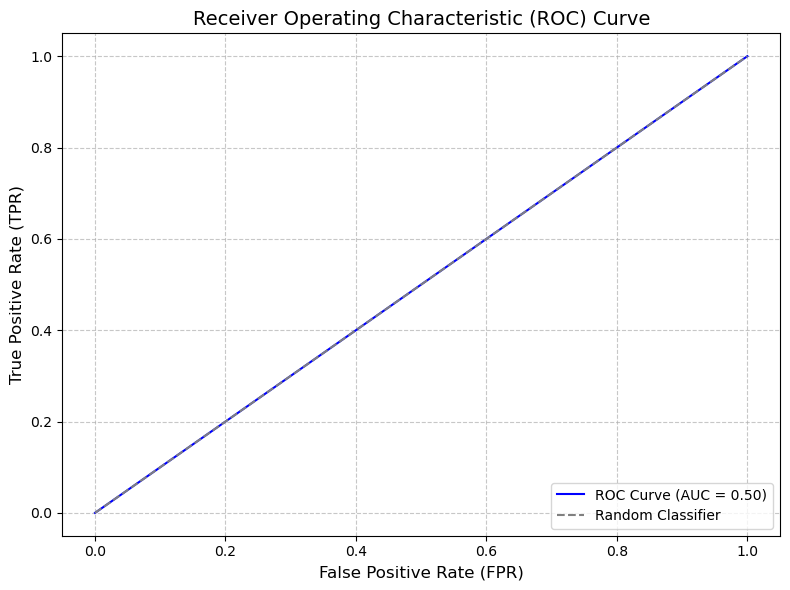

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on the test set (make sure y_true contains the actual labels)
y_proba = model.predict(test_generator).ravel()  # Getting probabilities for positive class
y_true = test_generator.classes  # Actual labels from the test set

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')  # Random classifier baseline
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### Let's implement the second model using ResNet50 for the same augmented and balanced dataset and compare it interactively with the EfficientNetB0 model.

### 4. ResNet50 Model Implementation

In [17]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained ResNet50
base_model_resnet = ResNet50(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
base_model_resnet.trainable = False  # Freeze pre-trained layers

# Add custom layers
x_resnet = base_model_resnet.output
x_resnet = GlobalAveragePooling2D()(x_resnet)
x_resnet = Dense(128, activation="relu")(x_resnet)
x_resnet = Dropout(0.3)(x_resnet)
output_resnet = Dense(1, activation="sigmoid")(x_resnet)

# Compile the ResNet50 model
resnet_model = Model(inputs=base_model_resnet.input, outputs=output_resnet)
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Display the model architecture
resnet_model.summary()

# Train ResNet50 model with class weights
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weight_dict  # Use the same class weights
)

# Save the final ResNet50 model
resnet_model.save("resnet50_chest_xray_model.h5")
print("Final ResNet50 model saved successfully as 'resnet50_chest_xray_model.h5'")


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 38, 38, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 38, 38, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 38, 38, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 19, 19, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 19, 19, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 19, 19, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 10, 10, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 10, 10, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 10, 10, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 10, 10, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 10, 10, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 10, 10, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 10, 10, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 5, 5, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 5, 5, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 5, 5, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 5, 5, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

### 5. Interactive Comparison of Models
### 5.1 Accuracy and Loss Trends

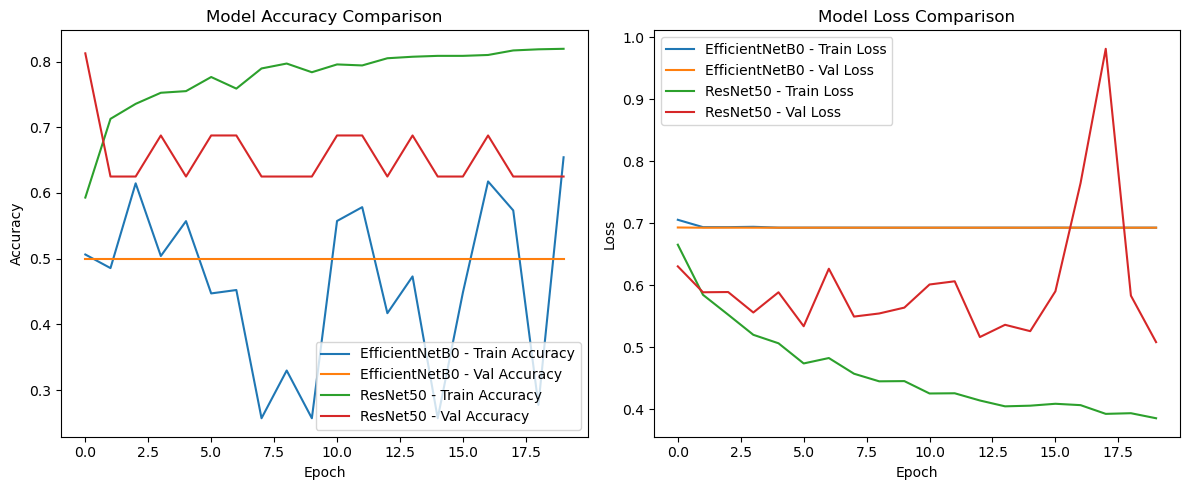

In [17]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy trends
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="EfficientNetB0 - Train Accuracy")
plt.plot(history.history['val_accuracy'], label="EfficientNetB0 - Val Accuracy")
plt.plot(history_resnet.history['accuracy'], label="ResNet50 - Train Accuracy")
plt.plot(history_resnet.history['val_accuracy'], label="ResNet50 - Val Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss trends
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="EfficientNetB0 - Train Loss")
plt.plot(history.history['val_loss'], label="EfficientNetB0 - Val Loss")
plt.plot(history_resnet.history['loss'], label="ResNet50 - Train Loss")
plt.plot(history_resnet.history['val_loss'], label="ResNet50 - Val Loss")
plt.title("Model Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


### 5.2 Confusion Matrix for Both Models

1/1 [==============================] - 2s 2s/step


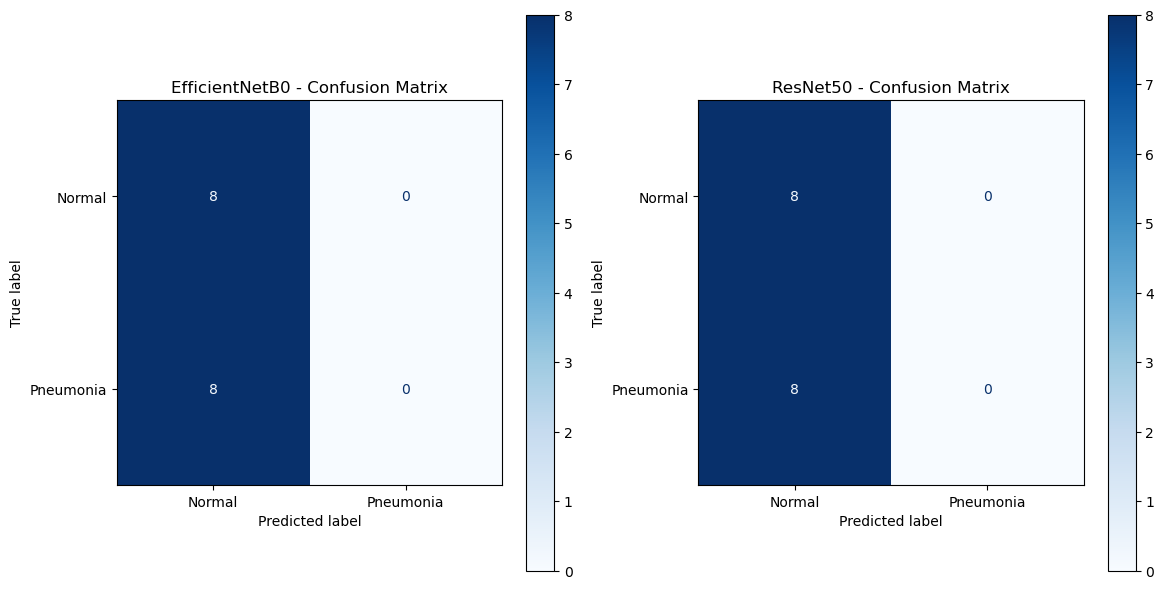

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict with both models
efficientnet_preds = np.argmax(model.predict(val_generator), axis=1)
resnet_preds = np.argmax(resnet_model.predict(val_generator), axis=1)
val_labels = val_generator.classes

# Confusion Matrix for EfficientNetB0
cm_efficientnet = confusion_matrix(val_labels, efficientnet_preds)
disp_efficientnet = ConfusionMatrixDisplay(cm_efficientnet, display_labels=['Normal', 'Pneumonia'])

# Confusion Matrix for ResNet50
cm_resnet = confusion_matrix(val_labels, resnet_preds)
disp_resnet = ConfusionMatrixDisplay(cm_resnet, display_labels=['Normal', 'Pneumonia'])

# Plot both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
disp_efficientnet.plot(cmap="Blues", ax=axes[0])
axes[0].set_title("EfficientNetB0 - Confusion Matrix")
disp_resnet.plot(cmap="Blues", ax=axes[1])
axes[1].set_title("ResNet50 - Confusion Matrix")
plt.tight_layout()
plt.show()


### 5.3 ROC Curve for Both Models

1/1 [==============================] - 1s 629ms/step


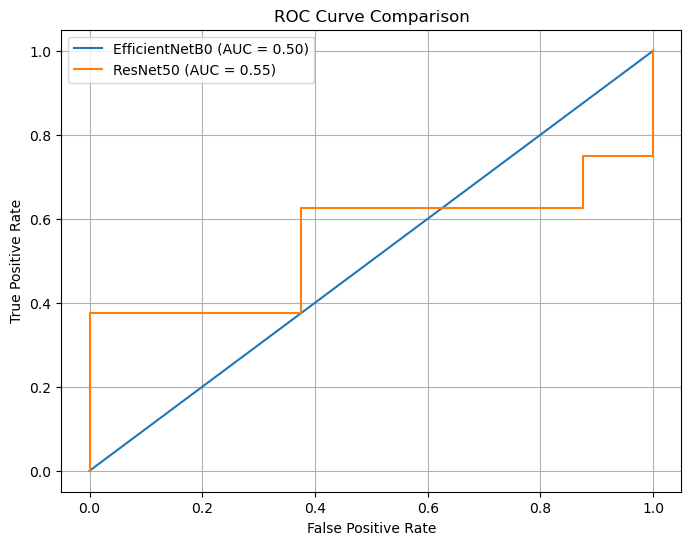

In [19]:
from sklearn.metrics import roc_curve, auc

# EfficientNetB0 ROC
y_proba_efficientnet = model.predict(val_generator).ravel()
fpr_efficientnet, tpr_efficientnet, _ = roc_curve(val_labels, y_proba_efficientnet)
roc_auc_efficientnet = auc(fpr_efficientnet, tpr_efficientnet)

# ResNet50 ROC
y_proba_resnet = resnet_model.predict(val_generator).ravel()
fpr_resnet, tpr_resnet, _ = roc_curve(val_labels, y_proba_resnet)
roc_auc_resnet = auc(fpr_resnet, tpr_resnet)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_efficientnet, tpr_efficientnet, label=f"EfficientNetB0 (AUC = {roc_auc_efficientnet:.2f})")
plt.plot(fpr_resnet, tpr_resnet, label=f"ResNet50 (AUC = {roc_auc_resnet:.2f})")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


### 5.4 Interactive visualization for comparing metrics between EfficientNetB0 and ResNet50

In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
import plotly.express as px

# Predictions
efficientnet_preds = np.argmax(model.predict(val_generator), axis=1)
resnet_preds = np.argmax(resnet_model.predict(val_generator), axis=1)
val_labels = val_generator.classes

# Compute Metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
    "EfficientNetB0": [
        accuracy_score(val_labels, efficientnet_preds),
        precision_score(val_labels, efficientnet_preds, average="weighted"),
        recall_score(val_labels, efficientnet_preds, average="weighted"),
        f1_score(val_labels, efficientnet_preds, average="weighted"),
        roc_auc_score(val_labels, np.argmax(model.predict(val_generator), axis=1)),
    ],
    "ResNet50": [
        accuracy_score(val_labels, resnet_preds),
        precision_score(val_labels, resnet_preds, average="weighted"),
        recall_score(val_labels, resnet_preds, average="weighted"),
        f1_score(val_labels, resnet_preds, average="weighted"),
        roc_auc_score(val_labels, np.argmax(resnet_model.predict(val_generator), axis=1)),
    ],
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Melt for interactive visualization
metrics_melted = metrics_df.melt(id_vars="Metric", var_name="Model", value_name="Score")

# Interactive Visualization with Plotly
fig = px.bar(
    metrics_melted,
    x="Metric",
    y="Score",
    color="Model",
    barmode="group",
    title="Interactive Comparison of Model Metrics",
    text="Score",
    height=600,
    color_discrete_sequence=px.colors.qualitative.Set2,
)

fig.update_layout(
    xaxis_title="Metrics",
    yaxis_title="Score",
    legend_title="Model",
    template="plotly_white",
    title_font=dict(size=20, family="Arial", color="black"),
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

1/1 [==============================] - 1s 674ms/step


### 5.5 Misclassified Images
### Showcase examples of misclassified images to demonstrate challenges faced by the model and discuss their implications.

20/20 [==============================] - 11s 537ms/step


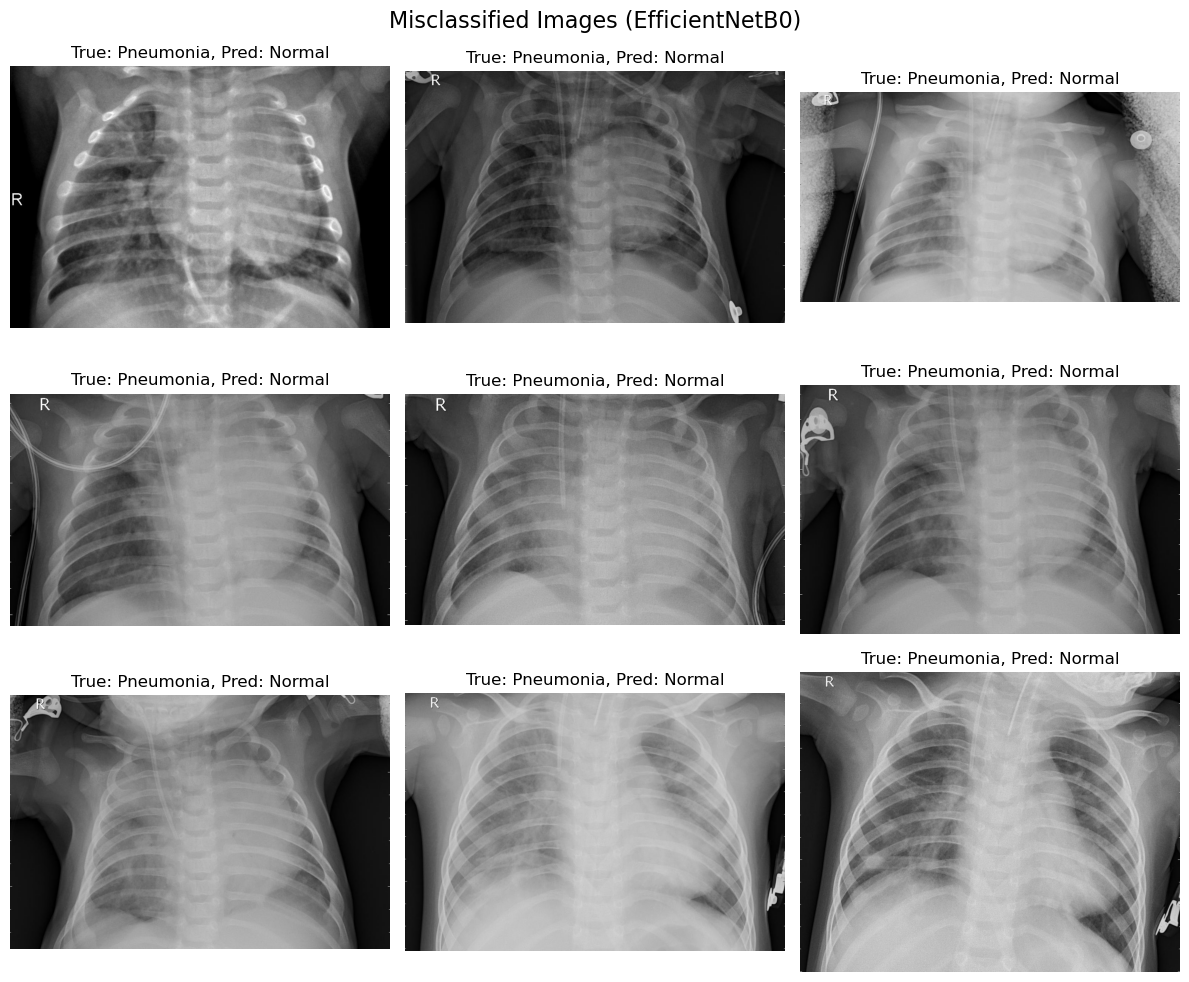

20/20 [==============================] - 25s 1s/step


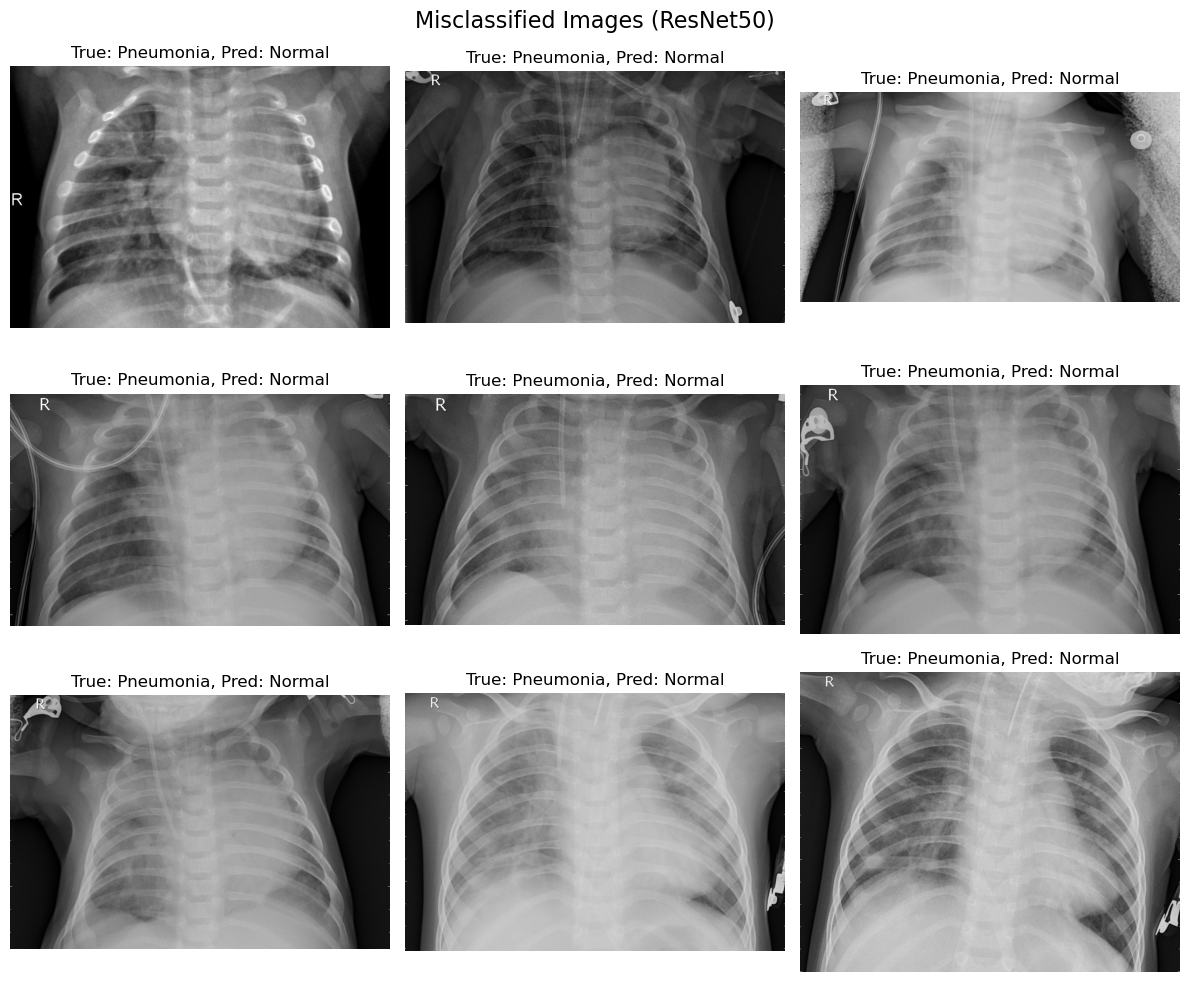

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_misclassified_images(test_generator, y_true, y_pred, model_name):
    """
    Display misclassified images along with their true and predicted labels.
    
    Args:
        test_generator: Test data generator.
        y_true: True labels for the test set.
        y_pred: Predicted labels for the test set.
        model_name: Name of the model for labeling.
    """
    misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true != pred]

    plt.figure(figsize=(12, 10))
    for i, idx in enumerate(misclassified_indices[:9]):  # Display up to 9 misclassified images
        file_path = test_generator.filepaths[idx]
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = "Normal" if y_true[idx] == 0 else "Pneumonia"
        pred = "Normal" if y_pred[idx] == 0 else "Pneumonia"
        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(f"True: {label}, Pred: {pred}")
        plt.axis("off")
    plt.suptitle(f"Misclassified Images ({model_name})", fontsize=16)
    plt.tight_layout()
    plt.show()

# Get predictions for EfficientNetB0
efficientnet_preds = np.argmax(model.predict(test_generator), axis=1)
display_misclassified_images(test_generator, test_generator.classes, efficientnet_preds, "EfficientNetB0")

# Get predictions for ResNet50
resnet_preds = np.argmax(resnet_model.predict(test_generator), axis=1)
display_misclassified_images(test_generator, test_generator.classes, resnet_preds, "ResNet50")


## <center>Thank You!</center>